# Practical example. Gaming System

## Problem

Given data from an gaming app. Each customer in the database has made a activity at least once, that's why he/she is in the database. We want to create a machine learning algorithm based on our available data that to predict the total deposit over the next 30 days.

The main idea is that if a customer has a low probability of coming back, there is no reason to spend any money on advertizing to him/her.

Given a .csv summarizing the data. There are five variables: 
* `tenure`, which is the number of days since the customers first activity,
* `deposit`, which is the sum of deposits up to a point in time,
* `turnover`, which is the sum of money spent up to a point in time,
* `withdrawal`, which is the sum of withdrawals up to a point in time, and
* `deposit_next`, which is the sum of deposits in the next 30 days (the target).

Pre-processing:
Prepare data and preprocess it. Before training the neural network, need to standardize the numerical features (tenure, deposit, turnover, withdrawal) to have zero mean and unit variance, to ensure that each feature contributes equally to the model. You can achieve this using a standard scaler from a machine learning library like scikit-learn. Create training, validation and test datasets.

Model Architecture:
Outlining the model with the layers and choose the activation functions. The input layer of the neural network will have 4 nodes, corresponding to the 4 features (tenure, deposit, turnover, withdrawal) in the dataset. The output layer will have a single node, corresponding to the predicted total deposit over the next 30 days. You can experiment with the number of hidden layers and nodes in each layer, but a good starting point would be to use 2 or 3 hidden layers with 16-32 nodes each. You can also experiment with different activation functions, such as ReLU or sigmoid.

Training:
Make the model to learn with appropriate optimizers and loss function. You can train the model using stochastic gradient descent (SGD) or an optimizer like Adam, with mean squared error (MSE) as the loss function. You can experiment with different learning rates and batch sizes to optimize the training process.

Evaluation:
To evaluate the performance of the model, you can split the dataset into training, validation and test sets, and use metrics like mean square error (MSE) to measure the prediction error. You can also plot the actual vs. predicted values to visualize the model's performance.

Post-processing:
After training the model, you can use it to predict the total deposit over the next 30 days for new customers with test data or by inputting their tenure, deposit, turnover, and withdrawal values. You may also want to inverse-transform the predicted value back to the original scale using the same scaler used in the pre-processing step.

The task is simple: create a machine learning algorithm, which is able to predict the total deposit over the next 30 days. 

This is a supervised regression problem with one outcome.

## Create the machine learning algorithm

# Import Required Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pickle 
from keras.models import load_model
import joblib
import tensorflow as tf

# Data

In [48]:
# Load the data into the pandas dataframe
data = pd.read_csv('data/data.csv')
print(data.shape)
print(data.head())

(20000, 5)
   tenure  deposit  turnover  withdrawal  deposit_next
0      10   762.27   1677.18     1476.24       2815.66
1    1473    69.99    279.16        0.00          0.00
2     297    34.35     81.99        0.00          0.00
3    3829  4347.15  41290.29        0.00          0.00
4    1258  3593.85  13883.59     8825.21          0.00


Pre-processing:
Prepare data and preprocess it. Before training the neural network, you may want to standardize the numerical features (tenure, deposit, turnover, withdrawal) to have zero mean and unit variance, to ensure that each feature contributes equally to the model. You can achieve this using a standard scaler from a machine learning library like scikit-learn. Shuffle the data to avoid the data is interdependent on dates. Create training, validation and test datasets.

Model Architecture:
Outlining the model with the layers and choose the activation functions. The input layer of the neural network will have 4 nodes, corresponding to the 4 features (tenure, deposit, turnover, withdrawal) in the dataset. The output layer will have a single node, corresponding to the predicted total deposit over the next 30 days. You can experiment with the number of hidden layers and nodes in each layer, but a good starting point would be to use 2 or 3 hidden layers with 16-32 nodes each. You can also experiment with different activation functions, such as ReLU or sigmoid because input data is non linear when checking againt the deposit_next so considering to implement supervised regression model with linear and nonlinear layers in the architecture.

Training:
Make the model to learn with appropriate optimizers and loss function. You can train the model using stochastic gradient descent (SGD) or an optimizer like Adam, with mean squared error (MSE) as the loss function. You can experiment with different learning rates and batch sizes to optimize the training process. Early stopping meachanism used to avoid the overfitting the model with the validation data.

Evaluation:
To evaluate the performance of the model, you can split the dataset into training and validation sets, and use metrics like mean sqaured error (MSE) to measure the prediction error. You can also plot the actual vs. predicted values to visualize the model's performance.

Post-processing:
After training the model, you can use it to predict the total deposit over the next 30 days for new customers by inputting their tenure, deposit, turnover, and withdrawal values. You may also want to inverse-transform the predicted value back to the original scale using the same scaler used in the pre-processing step.

# Data Preprocessing

In [49]:
data.isnull().sum()

tenure          0
deposit         0
turnover        0
withdrawal      0
deposit_next    0
dtype: int64

Data did not contain the null values.

In [50]:
print(data.describe())

             tenure       deposit      turnover    withdrawal  deposit_next
count  20000.000000  2.000000e+04  2.000000e+04  2.000000e+04  20000.000000
mean    1864.481550  1.369928e+04  9.769238e+04  1.006299e+04    508.521096
std     1981.166128  6.977305e+04  6.342309e+05  5.414508e+04   1999.365001
min        0.000000  2.175000e+01  0.000000e+00  0.000000e+00      0.000000
25%      197.000000  1.376875e+02  4.154825e+02  0.000000e+00      0.000000
50%     1254.000000  8.297000e+02  3.382435e+03  3.289600e+02      0.000000
75%     2970.000000  4.825380e+03  2.602971e+04  3.507213e+03    214.595000
max     7969.000000  2.851920e+06  3.815992e+07  3.328575e+06  94871.490000


Data is from long tenure of 7969 days and depost, turnover, withdrawal and deposit_next contains data varies on large scale.

                tenure   deposit  turnover  withdrawal  deposit_next
tenure        1.000000  0.214081  0.165520    0.197285      0.043125
deposit       0.214081  1.000000  0.896557    0.952798      0.238517
turnover      0.165520  0.896557  1.000000    0.820543      0.188775
withdrawal    0.197285  0.952798  0.820543    1.000000      0.239993
deposit_next  0.043125  0.238517  0.188775    0.239993      1.000000


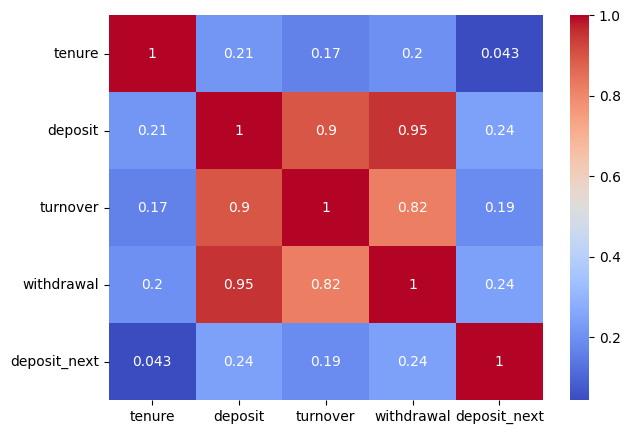

In [51]:
print(data.corr())
plt.figure(figsize=(7,5))
correlation = data.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

Correlation shows that deposit, turover and withdrawal are highly positively corelated with corelation scale of 0.82 to 0.95.
In the large scale one measure is enough instaed of keeping all corelate measures. At this moment we have only four input features so using all the available features for the model training.  

# Splitting Data 

In [52]:
# Get the input variables into X and output feature into Y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Scale the input features to a similar scaling range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Shuffle the data

In [53]:
# When the data was collected it might be actually arranged by date
# Shuffling the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible
shuffled_indices = np.arange(X_scaled.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = X_scaled[shuffled_indices]
shuffled_targets = y[shuffled_indices]

In [54]:
# Save the datasets in *.npz.
np.savez('Gaming_data_train', inputs=shuffled_inputs, targets=shuffled_targets)

In [55]:
# let's create a temporary variable npz, where we will retrive datasets
npz = np.load('Gaming_data_train.npz')
# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
saved_inputs = npz['inputs'].astype(float)
saved_targets = npz['targets'].astype(float)

In [56]:
# Split the dataset into training and test sets
train_inputs, test_inputs, train_outcome, test_outcome = train_test_split(saved_inputs, saved_targets, test_size=0.2, random_state=42)

# Model Creation

In [57]:
# intialize width of the input, output and hidden layers
input_size = train_inputs.shape[1]
output_size = 1
hidden_layer_size = 64

# Define the model architecture
CustomerDepositModel = Sequential()
CustomerDepositModel.add(Dense(units=hidden_layer_size, activation='relu', input_dim=input_size))
CustomerDepositModel.add(Dense(units=hidden_layer_size, activation='relu'))
CustomerDepositModel.add(Dense(units=output_size, activation='linear'))

Choose the optimizer and the loss function

In [58]:
# Compile the model
CustomerDepositModel.compile(loss='mean_squared_error',
                             optimizer='adam')

# Training

In [64]:
# set a maximum number of training epochs
NUM_EPOCHS = 100

# set the batch size
BATCH_SIZE = 32

# set an early stopping mechanism
# let's set patience=5, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

# Train the model
model_history= CustomerDepositModel.fit(train_inputs, 
                         train_outcome, 
                         epochs= NUM_EPOCHS, 
                         batch_size= BATCH_SIZE, 
                         callbacks= early_stopping,
                         validation_split=0.2,
                         verbose=2)

Epoch 1/100
400/400 - 1s - loss: 3690172.7500 - val_loss: 2870579.0000 - 1s/epoch - 3ms/step
Epoch 2/100
400/400 - 1s - loss: 3690344.2500 - val_loss: 2868402.2500 - 921ms/epoch - 2ms/step
Epoch 3/100
400/400 - 1s - loss: 3693864.7500 - val_loss: 2868509.5000 - 912ms/epoch - 2ms/step
Epoch 4/100
400/400 - 1s - loss: 3693415.2500 - val_loss: 2871883.0000 - 979ms/epoch - 2ms/step
Epoch 5/100
400/400 - 1s - loss: 3689944.2500 - val_loss: 2870844.2500 - 923ms/epoch - 2ms/step
Epoch 6/100
400/400 - 1s - loss: 3685700.7500 - val_loss: 2866140.5000 - 1s/epoch - 3ms/step
Epoch 7/100
400/400 - 1s - loss: 3691665.0000 - val_loss: 2870298.2500 - 964ms/epoch - 2ms/step
Epoch 8/100
400/400 - 1s - loss: 3683713.2500 - val_loss: 2871714.2500 - 983ms/epoch - 2ms/step
Epoch 9/100
400/400 - 1s - loss: 3690824.7500 - val_loss: 2866619.5000 - 938ms/epoch - 2ms/step
Epoch 10/100
400/400 - 1s - loss: 3681833.0000 - val_loss: 2867157.5000 - 942ms/epoch - 2ms/step
Epoch 11/100
400/400 - 1s - loss: 3682810.000

Algorithem Execution:

1. The algorithm will iterate over a preset number of bacthes all from train_data
2. The weights and biases are updated as many times as batches
3. We get a value for the loss function to indcate how the training is going
4. At the end of the epoch the algorithm will forward propagate the whole validation set
5. When reach the maximum number of epochs the training will be over

There are several main adjustments can try and tune the hyperparameters of the algorithm.

1. The *width* (the hidden layer size) of the algorithm. Can try a hidden layer size of 200. How does the validation loss of the model change? What about the time it took the algorithm to train? Can find a hidden layer size that does better?
2. The *depth* of the algorithm. Adding another hidden layer to the algorithm. How does the validation loss change? What about the time it took the algorithm to train? 
3. The *width and depth* of the algorithm. Add as many additional layers as you need to reach 5 hidden layers. Moreover, adjust the width of the algorithm as find suitable. How does the validation loss change? What about the time it took the algorithm to train?
4. Fiddle with the activation functions. Try applying a ReLu to the first hidden layer and tanh to the second one. The tanh activation is given by the string 'tanh'.
5. Adjust the batch size. Try a batch size of 100. How does the required time change? What about the loss?
6. Adjust the batch size. Try a batch size of 1. That's the SGD. How do the time and loss change? 
7. Adjust the learning rate. Try a value of 0.0001. Does it make a difference?
8. Adjust the learning rate. Try a value of 0.02. Does it make a difference?
9. Combine all the methods above and try to reach a good validation loss.

In [60]:
CustomerDepositModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


## Test the model

After training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

It is very important to realize that fiddling with the hyperparameters overfits the validation dataset. 

In [61]:
# Evaluate the model on the test data
mse = CustomerDepositModel.evaluate(test_inputs, test_outcome)
print("Mean Squared Error: {0:.2f}".format(mse))

125/125 [==============================] - 0s 2ms/step - loss: 2257049.0000
Mean Squared Error: 2257049.00


# Save Model and scaler

In [62]:
pickle.dump(CustomerDepositModel, open("predict_customer_deposit_model.pkl", "wb"))
joblib.dump(scaler, 'scaler.save') 

['scaler.save']

# Load Model for Prediction

In [63]:
new_customer = np.array([[1009, 2508.79, 17094.33, 1370.57]]) # tenure, deposit, turnover, withdrawal
new_customer = scaler.transform(new_customer)
modelNew = pickle.load(open("predict_customer_deposit_model.pkl", 'rb'))

predicted_dep = modelNew.predict(new_customer)
print(predicted_dep)

1/1 [==============================] - 0s 155ms/step
[[207.34218]]


Using the initial model and hyperparameters given in this notebook, the final test loss is measured as Mean Squared Error: 2257049.00.
The testing loss is 3690193.5000 and validation the loss is 2877696.7500 which shows that the model is able train with the data and able to give better predictions.
Note that each time the code is rerun, we get a different loss because each training is different. 
We have reached a suboptimal solution, so we have space to build and improve on it!